In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [47]:
df = pd.read_csv("/Users/auliaazmi/Downloads/heart.csv", sep=";")

In [37]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.03,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.05,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.04,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.08,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.06,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.04,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.03,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.00,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.05,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.06,2,0,2,1


In [39]:
df.shape

(303, 14)

Age                  : The age of the patient, in years.
Sex                  : The sex of the patient, encoded as 0 for female and 1 for male.
Chest pains          : The type of chest pain experienced by the patient, encoded as 0 for typical angina, 1 for atypical 
                        angina, 2 for non-anginal pain, and 3 for asymptomatic.
Trestbps             : The resting blood pressure of the patient (in mm Hg) when they were admitted to the hospital.
Chol (Cholesterol)   : The cholesterol level of the patient (in mg/dl).
Fbs                  : The level of fasting blood sugar (in mg/dl) in the patient's body. A value higher than 120 mg/dl is  
                        considered abnormal.
Restecg              : The results of the resting electrocardiogram of the patient, encoded as 0 for normal, 1 for having ST-T 
                        wave abnormality, and 2 for showing probable or definite left ventricular hypertrophy.
Thalach              : The maximum heart rate achieved by the patient during exercise (in beats per minute).
Exang                : The presence of exercise-induced angina, encoded as 0 for no and 1 for yes.
Oldpeak              : The amount of ST depression (measured in mm) induced by exercise relative to rest.
Slope                : The slope of the peak exercise ST segment, encoded as 0 for upsloping, 1 for flat, and 2 for downsloping.
Ca                   : The number of major blood vessels (0-3) colored by fluoroscopy.
Thal                 : A blood disorder called thalassemia, encoded as 0 for normal, 1 for fixed defect, and 2 for reversible 
                        defect.

## Exploratory Data Analysis

In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,0.79,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.08,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.08,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.06,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.02,2.00,4.00,3.00,1.00


<AxesSubplot:>

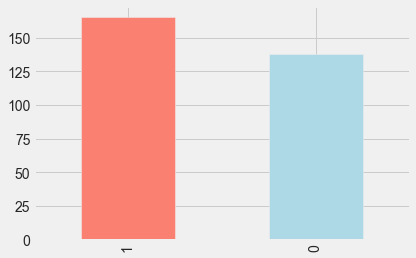

In [5]:
df.target.value_counts().plot(kind="bar", color=["salmon","lightblue"])

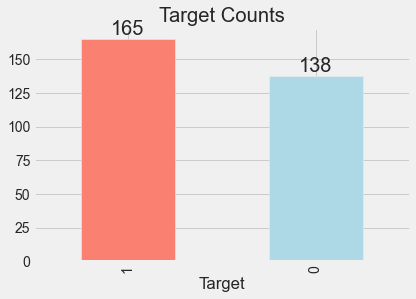

In [55]:
df1 = pd.DataFrame({
    'Target': ['1', '0'],
    'Sum': [165, 138]
})
# Create a barplot
ax = df1.plot(kind='bar', x='Target', y='Sum', color=["salmon","lightblue"], legend=None)

# Add a title
ax.set_title('Target Counts')

# Add the sum of each bar
for i in ax.containers:
    ax.bar_label(i, fontsize=20)

# Display the plot
plt.show()

In [42]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

We have 165 people with heart disease and 138 people without heart disease, meaning that our data is relatively balanced; not biased

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('-------------------------------------------------------------------------------------')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

-------------------------------------------------------------------------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
-------------------------------------------------------------------------------------
sex : [1 0]
-------------------------------------------------------------------------------------
cp : [3 2 1 0]
-------------------------------------------------------------------------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
-------------------------------------------------------------------------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 20

In [64]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [9]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

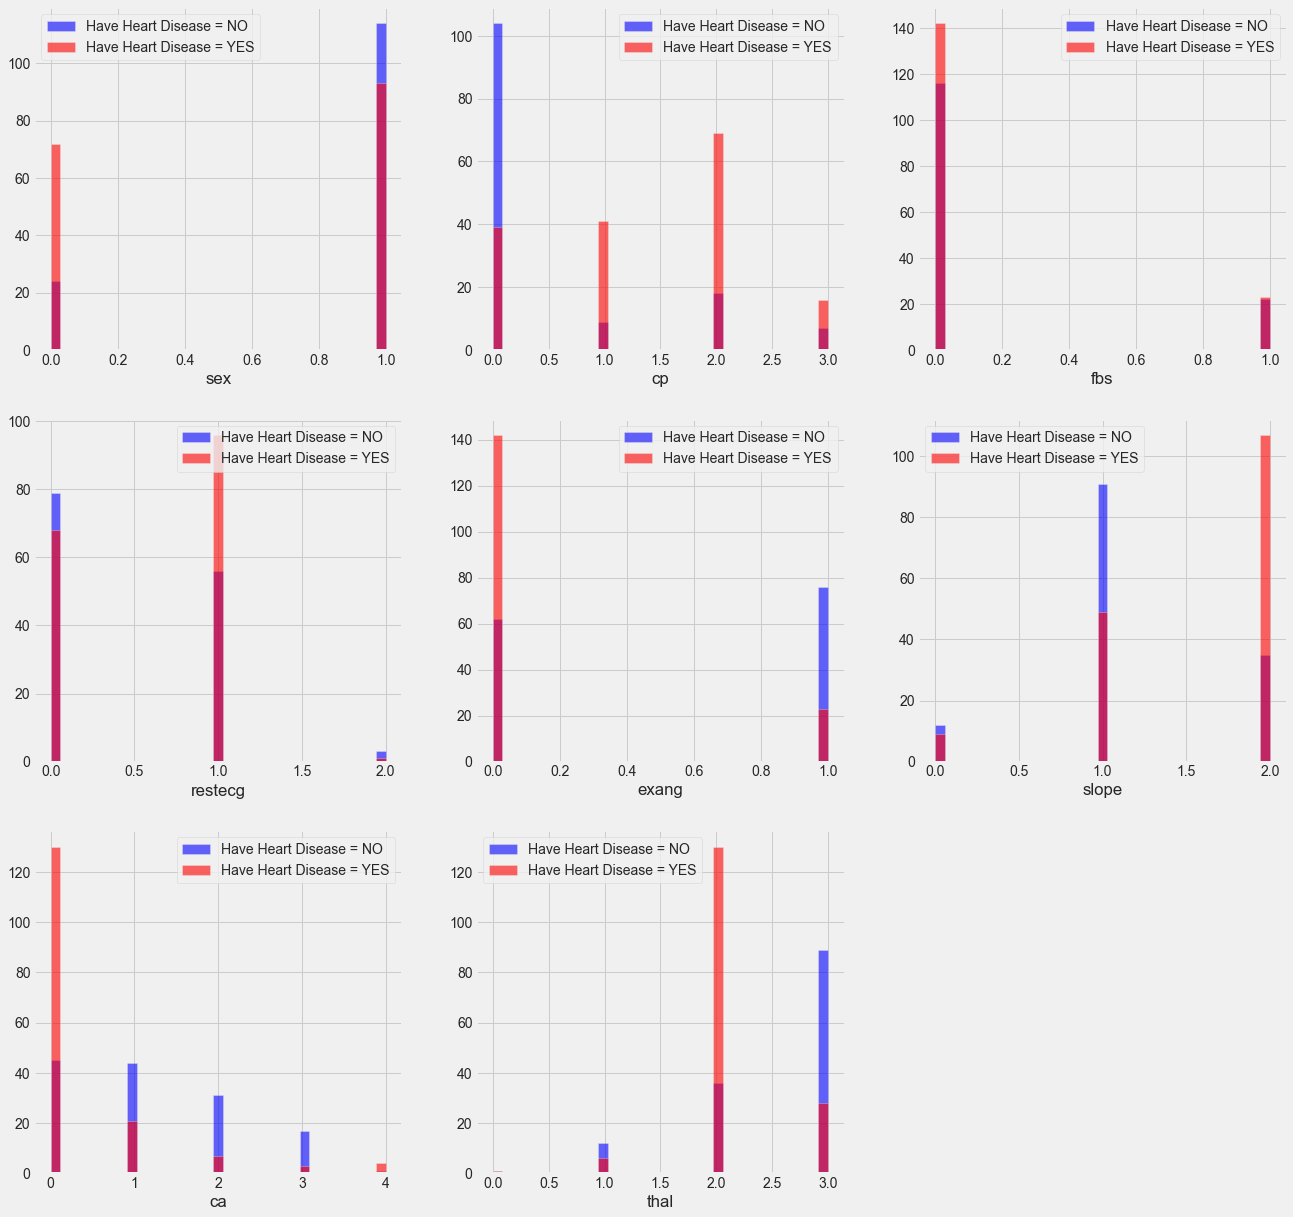

In [57]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

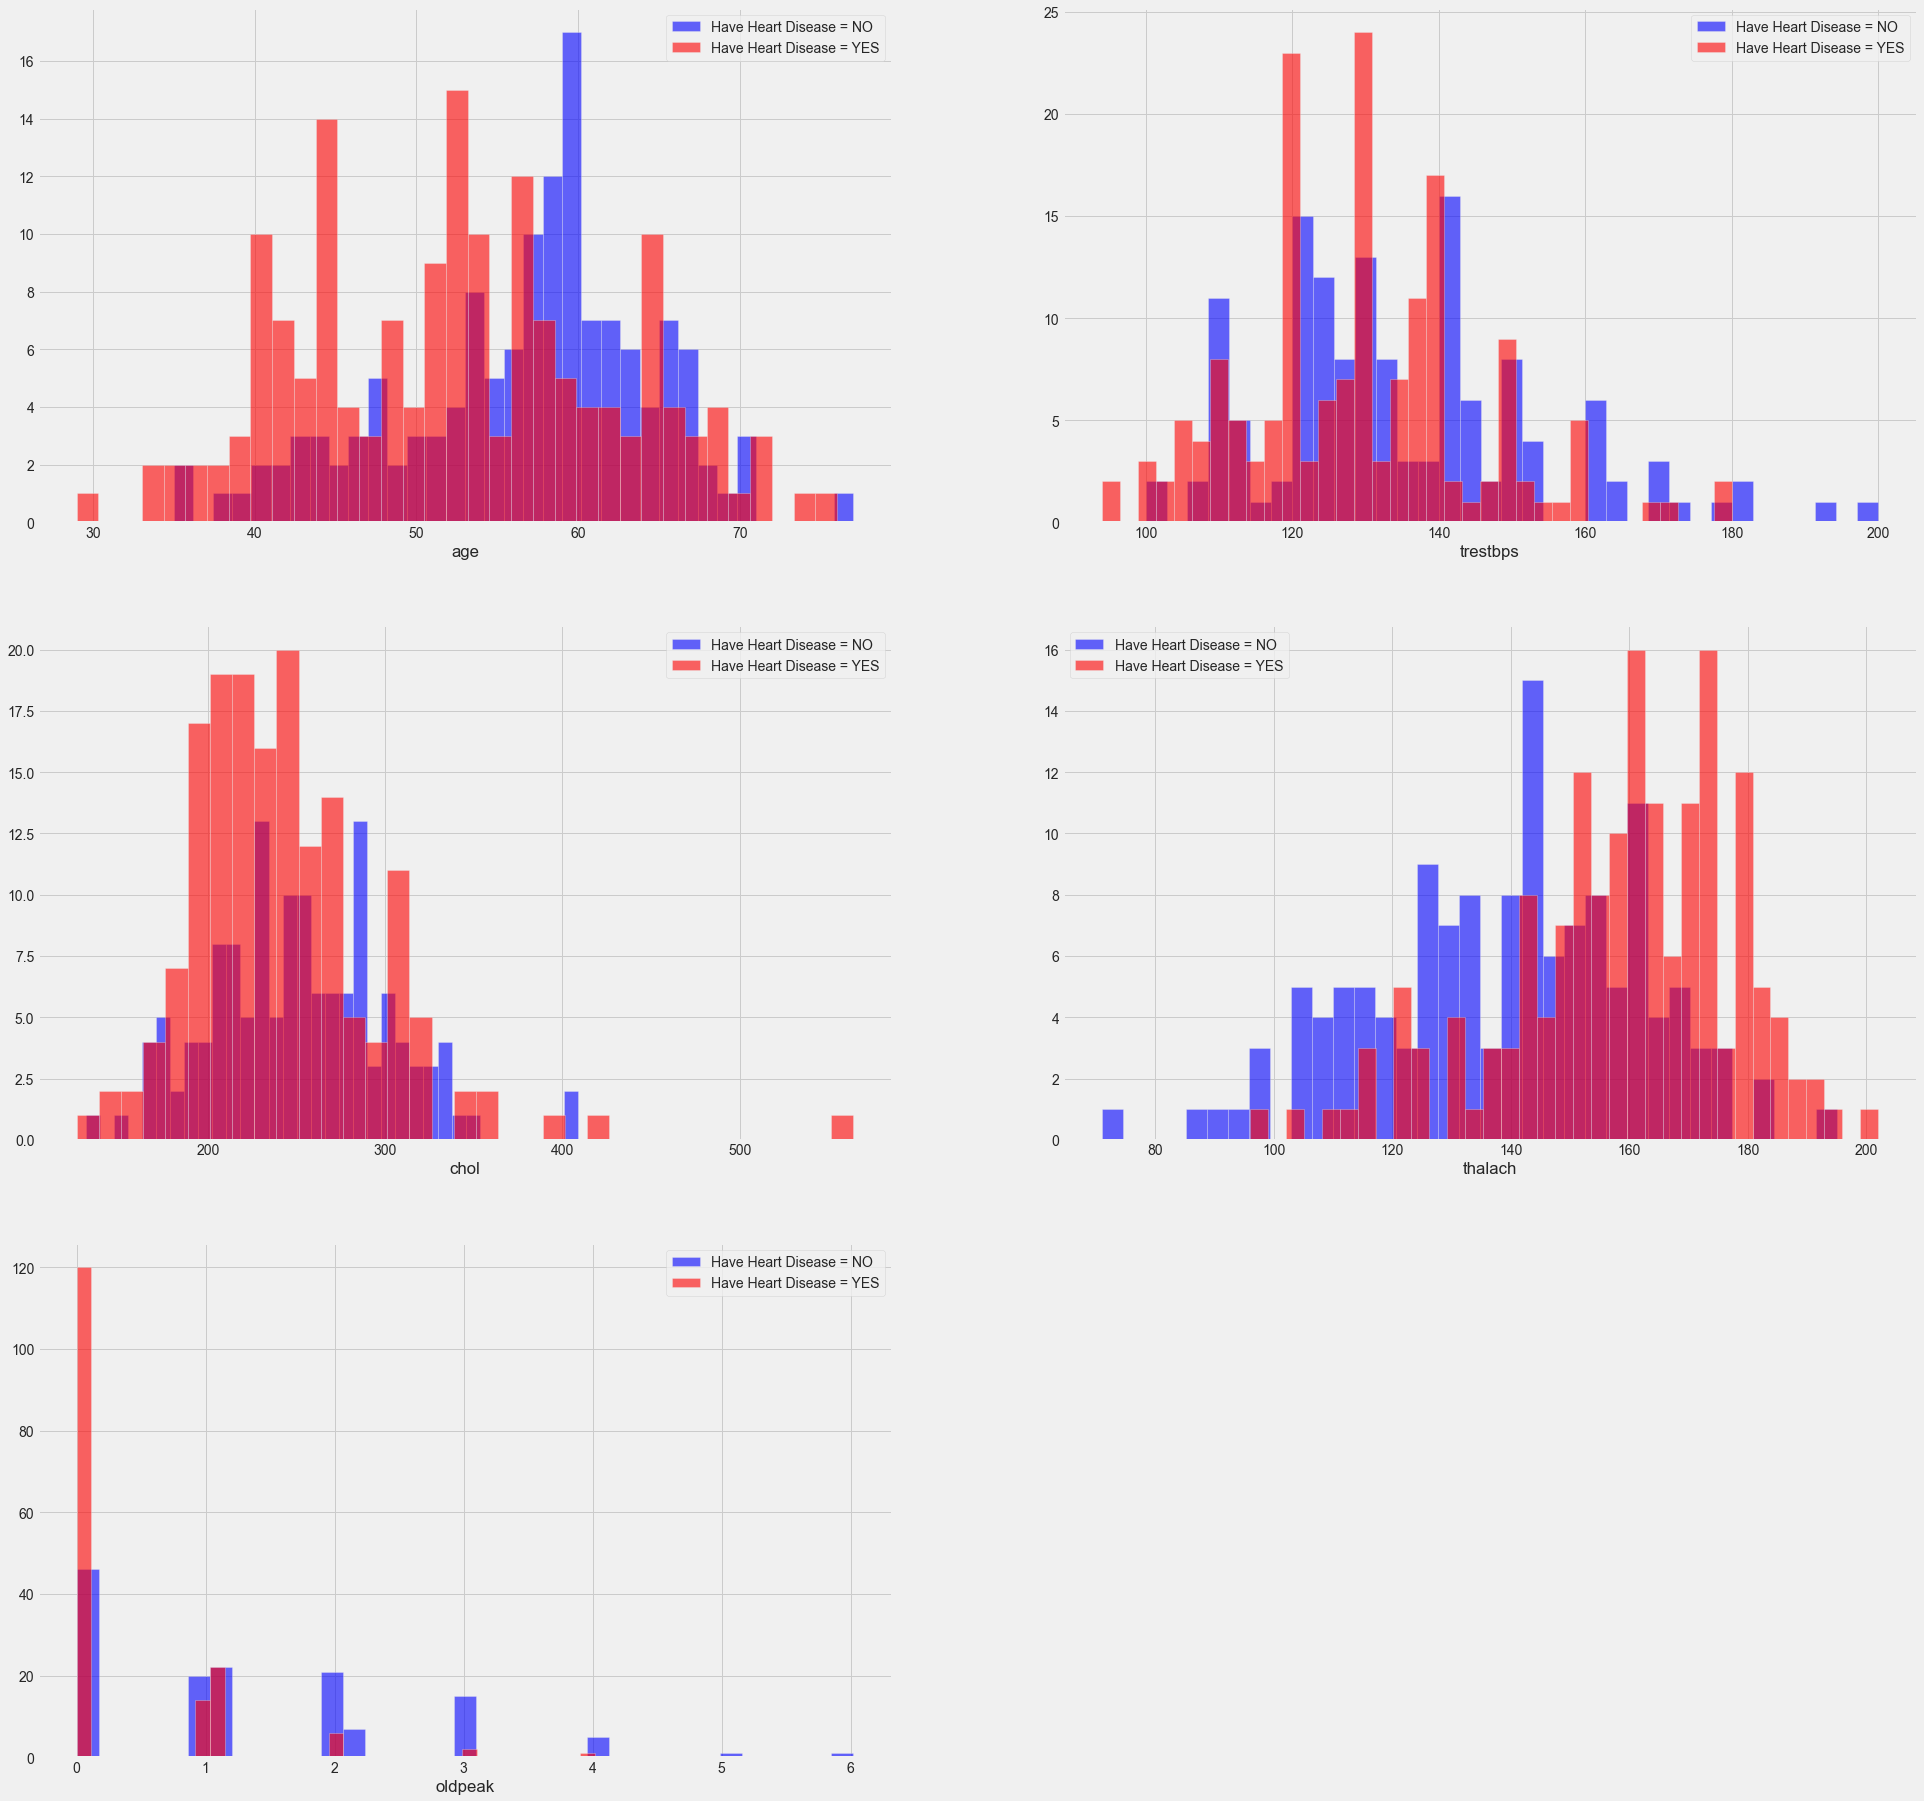

In [12]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

trestbps: resting blood pressure anything above 130-140 is generally of concern
chol: greater than 200 is of concern.

thalach: People with a maximum of over 140 are more likely to have heart disease.

the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

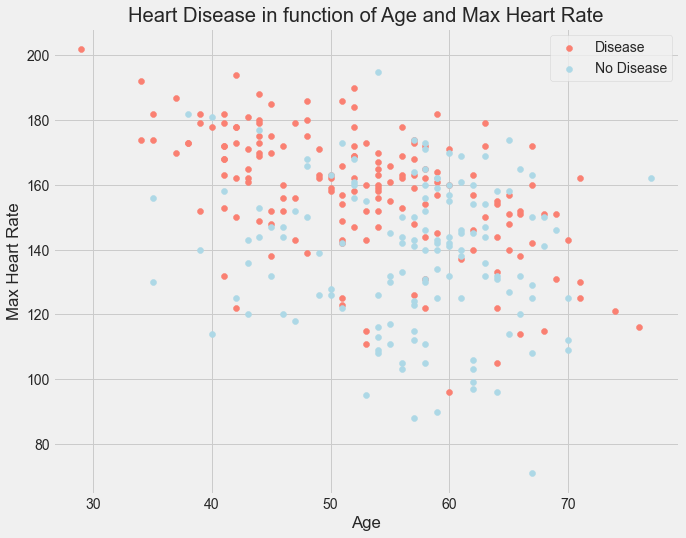

In [13]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Correlation Matrix

(14.5, -0.5)

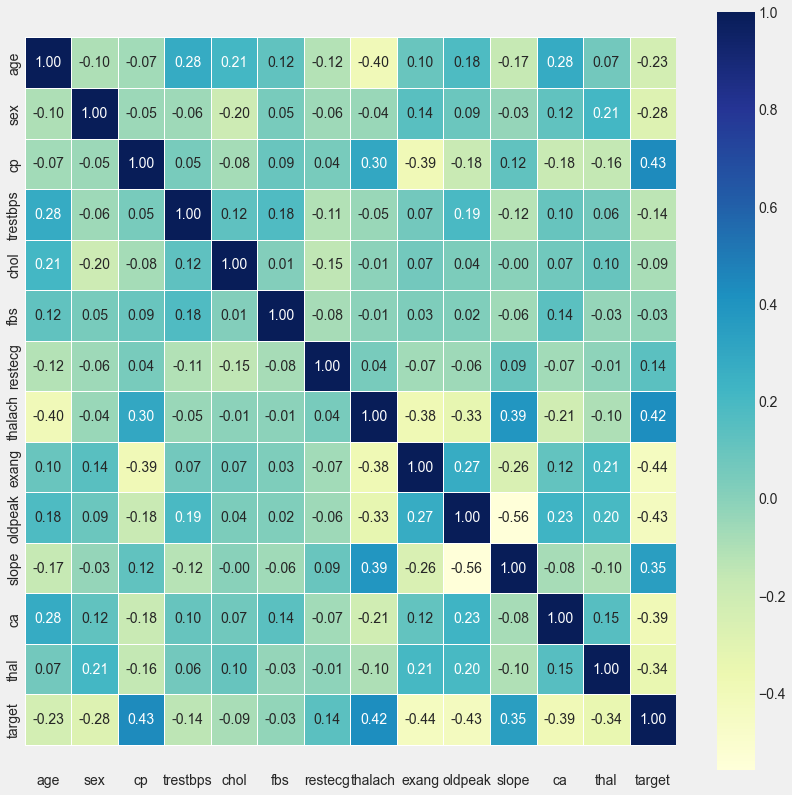

In [59]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(13, 13))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

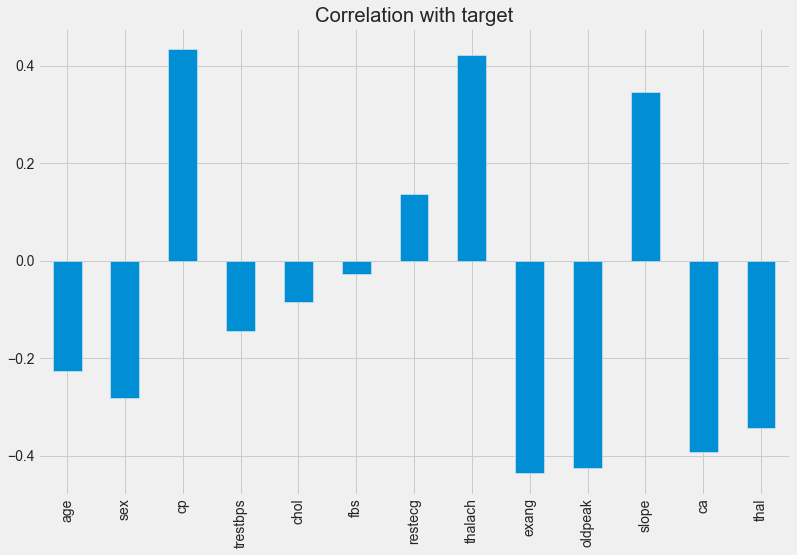

In [15]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Observations from correlation:

fbs and chol are the least correlated with the target variable.

All other variables have a significant correlation with the target variable.

## Data Preprocessing

In [16]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

## Pre-Training

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")


In [93]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.86      0.87       0.87          0.87
recall      0.83   0.90      0.87       0.86          0.87
f1-score    0.85   0.88      0.87       0.87          0.87
support   109.00 133.00      0.87     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.91      0.90       0.90          0.90
recall     0.90  0.91      0.90       0.90          0.90
f1-score   0.90  0.91      0.90       0.90          0.90
support   29.00 32.00      0.90      61.00         61.00
_______________________________________________


In [79]:
from sklearn.linear_model import LogisticRegression

lr_clf1 = LogisticRegression()
lr_clf1.fit(X_train, y_train)

print_score(lr_clf1, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.86      0.87       0.87          0.87
recall      0.83   0.90      0.87       0.86          0.87
f1-score    0.85   0.88      0.87       0.87          0.87
support   109.00 133.00      0.87     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.91      0.90       0.90          0.90
recall     0.90  0.91      0.90       0.90          0.90
f1-score   0.90  0.91      0.90       0.90          0.90
support   29.00 32.00      0.90      61.00         61.00
_______________________________________________


In [70]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.78,90.16


In [ ]:
results_df = results_df.append({'Model', 'Training Accuracy %', 'Testing Accuracy %'}, ignore_index=True)

In [65]:
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.9016393442622951
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## SVM

In [21]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


print_score(svm_linear, X_train, y_train, X_test, y_test, train=True)
print_score(svm_linear, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.60%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.86      0.88       0.88          0.88
recall      0.81   0.93      0.88       0.87          0.88
f1-score    0.85   0.89      0.88       0.87          0.88
support   109.00 133.00      0.88     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 88  21]
 [  9 124]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.90      0.87       0.87          0.87
recall     0.90  0.84      0.87       0.87          0.87
f1-score   0.87  0.87      0.87       0.87          0.87
support   29.00 32.00      0.87      61.00         61.00
_______________________________________________


In [22]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8688524590163934
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [23]:
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)


print_score(svm_poly, X_train, y_train, X_test, y_test, train=True)
print_score(svm_poly, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.91      0.93       0.93          0.93
recall      0.89   0.96      0.93       0.93          0.93
f1-score    0.92   0.94      0.93       0.93          0.93
support   109.00 133.00      0.93     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 97  12]
 [  5 128]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.90      0.87       0.87          0.87
recall     0.90  0.84      0.87       0.87          0.87
f1-score   0.87  0.87      0.87       0.87          0.87
support   29.00 32.00      0.87      61.00         61.00
_______________________________________________


In [24]:
y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8688524590163934
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [25]:
from sklearn.svm import SVC

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)


print_score(svm_sigmoid, X_train, y_train, X_test, y_test, train=True)
print_score(svm_sigmoid, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.17%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.82   0.79      0.80       0.81          0.80
recall      0.72   0.87      0.80       0.79          0.80
f1-score    0.76   0.83      0.80       0.80          0.80
support   109.00 133.00      0.80     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 78  31]
 [ 17 116]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.84  0.93      0.89       0.89          0.89
recall     0.93  0.84      0.89       0.89          0.89
f1-score   0.89  0.89      0.89       0.89          0.89
support   29.00 32.00      0.89      61.00         61.00
_______________________________________________


In [26]:
y_pred = svm_sigmoid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8852459016393442
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [27]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


print_score(svm_rbf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_rbf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.91      0.93       0.93          0.93
recall      0.89   0.96      0.93       0.93          0.93
f1-score    0.92   0.94      0.93       0.93          0.93
support   109.00 133.00      0.93     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 97  12]
 [  5 128]]

Test Result:
Accuracy Score: 91.80%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.94      0.92       0.92          0.92
recall     0.93  0.91      0.92       0.92          0.92
f1-score   0.92  0.92      0.92       0.92          0.92
support   29.00 32.00      0.92      61.00         61.00
_______________________________________________


In [28]:
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.9180327868852459
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



            Train       Test
linear      87.26       84.62
rbf         92.45       86.81
sigmoid     80.19       86.81
poly        95.75       85.71

## KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 31)}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 16}
Best score: 0.8344387755102041


In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.9016393442622951
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [141]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.30%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.83      0.84       0.85          0.84
recall      0.77   0.90      0.84       0.84          0.84
f1-score    0.82   0.86      0.84       0.84          0.84
support   109.00 133.00      0.84     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 84  25]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.91      0.90       0.90          0.90
recall     0.90  0.91      0.90       0.90          0.90
f1-score   0.90  0.91      0.90       0.90          0.90
support   29.00 32.00      0.90      61.00         61.00
_______________________________________________


In [31]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8360655737704918
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print_score(svm_rbf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_rbf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 92.98%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.91      0.93       0.93          0.93
recall      0.89   0.96      0.93       0.93          0.93
f1-score    0.92   0.94      0.93       0.93          0.93
support   109.00 133.00      0.93     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 97  12]
 [  5 128]]

Test Result:
Accuracy Score: 91.80%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.94      0.92       0.92          0.92
recall     0.93  0.91      0.92       0.92          0.92
f1-score   0.92  0.92      0.92       0.92          0.92
support   29.00 32.00      0.92      61.00         61.00
_______________________________________________


In [33]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.4918032786885246
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.93      0.64        29
           1       0.60      0.09      0.16        32

    accuracy                           0.49        61
   macro avg       0.54      0.51      0.40        61
weighted avg       0.54      0.49      0.39        61



## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.8524590163934426
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Random Forrest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Accuracy: 0.8360655737704918
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [88]:

results_df1 = pd.DataFrame(
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df1

,Model,Training Accuracy %,Testing Accuracy %


In [90]:
models = [lr_clf1, svm_rbf, knn1, gnb, dt, rf]

In [91]:
for model in models:
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100

    results_df1 = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/1800738035.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)
/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/1800738035.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)
/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/1800738035.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df1 = results_df1.append({'Model': str(model), 'Tra

In [76]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.78,90.16
1,SVC(kernel='linear'),87.60,86.89
2,SVC(kernel='poly'),92.98,86.89
3,SVC(kernel='sigmoid'),80.17,88.52
4,SVC(),92.98,91.80
5,KNeighborsClassifier(n_neighbors=4),86.78,83.61
6,GaussianNB(),55.79,49.18
7,DecisionTreeClassifier(),100.00,85.25
8,RandomForestClassifier(),100.00,85.25


In [92]:
results_df1

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression(),86.78,90.16
1,SVC(),92.98,91.80
2,KNeighborsClassifier(),88.43,88.52
3,GaussianNB(),55.79,49.18
4,DecisionTreeClassifier(),100.00,85.25
5,RandomForestClassifier(),100.00,85.25


In [94]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.87   0.86      0.87       0.87          0.87
recall      0.83   0.90      0.87       0.86          0.87
f1-score    0.85   0.88      0.87       0.87          0.87
support   109.00 133.00      0.87     242.00        242.00
_______________________________________________
Confusion Matrix: 
 [[ 90  19]
 [ 13 120]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.90  0.91      0.90       0.90          0.90
recall     0.90  0.91      0.90       0.90          0.90
f1-score   0.90  0.91      0.90       0.90          0.90
support   29.00 32.00      0.90      61.00         61.00
_______________________________________________


In [ ]:
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

## NEW LOGISTIC REGRESSION

In [113]:

results_lr = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

In [106]:
from sklearn.linear_model import LogisticRegression

solvers = ["newton-cg", "lbfgs", "liblinear", "sag"]

for solver in solvers:

    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100
    results_lr = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)
    
    print('-------------------------------------------------------------------------------------')
    print(str(model))
    print('-------------------------------------------------------------------------------------')
    report = classification_report(y_test, y_pred)
    print("Classification report:\n", report)
    



-------------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

-------------------------------------------------------------------------------------
LogisticRegression()
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/4029284138.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)
/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/4029284138.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_df1.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)
/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/4029284138.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_df1.append({'Model': str(model), 'Tra

## HYPERPARAMETER LR

In [114]:
model = LogisticRegression(solver="newton-cg")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
LogisticRegression(solver='newton-cg')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/1179247721.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [115]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
LogisticRegression()
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/936376934.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [117]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
LogisticRegression(solver='liblinear')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/3734834046.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [118]:
model = LogisticRegression(solver="sag")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
LogisticRegression(solver='sag')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/3161145902.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_lr = results_lr.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [119]:
results_lr

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression(solver='newton-cg'),86.78,90.16
1,LogisticRegression(),86.78,90.16
2,LogisticRegression(solver='liblinear'),86.78,90.16
3,LogisticRegression(solver='sag'),86.78,90.16


## HYPERPARAMETER 2 LOGISTIC REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
model = LogisticRegression()

# Define the grid of hyperparameters to search over
param_grid = {
    'solver': ["newton-cg", "lbfgs", "liblinear", "sag"],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score:  0.8385204081632652


/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/auliaazmi/opt/anaconda3/envs/venv1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

## HYPERPARAMETER SVM

In [131]:

results_svm = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

In [132]:
model = SVC(kernel="linear", C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
SVC(C=1, kernel='linear')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/253217756.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [135]:
model = SVC(kernel="poly", C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
SVC(C=1, kernel='poly')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/3525769462.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [133]:
model = SVC(kernel="rbf", C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
SVC(C=1)
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/2858543106.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [136]:
model = SVC(kernel="sigmoid", C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

print('-------------------------------------------------------------------------------------')
print(str(model))
print('-------------------------------------------------------------------------------------')
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

-------------------------------------------------------------------------------------
SVC(C=1, kernel='sigmoid')
-------------------------------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/677893520.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_svm = results_svm.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


In [137]:
results_svm

,Model,Training Accuracy %,Testing Accuracy %
0,"SVC(C=1, kernel='linear')",87.60,86.89
1,SVC(C=1),92.98,91.80
2,"SVC(C=1, kernel='poly')",92.98,86.89
3,"SVC(C=1, kernel='sigmoid')",80.17,88.52


## HYPER PARAMETER 2 SVM

In [129]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
model = SVC()

# Define the grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 1, 'kernel': 'poly'}
Best score:  0.8386904761904763


## HYPER PARAMETER KNN

## COMPARISON

In [166]:

results_cp = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/2465083387.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cp = results_cp.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


<AxesSubplot:>

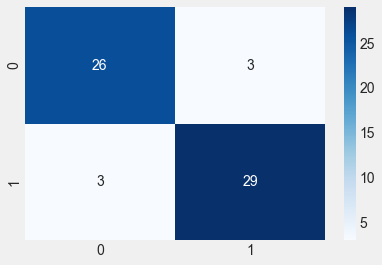

In [167]:
model = LogisticRegression(solver="newton-cg", C=1, penalty='l2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_cp = results_cp.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')

In [168]:
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_14503/3373468391.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_cp = results_cp.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)


<AxesSubplot:>

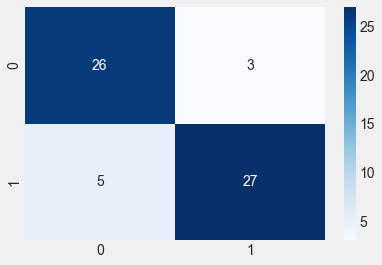

In [169]:
model = SVC(kernel='poly',C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
results_cp = results_cp.append({'Model': str(model), 'Training Accuracy %': train_score, 'Testing Accuracy %': test_score}, ignore_index=True)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')


In [170]:
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

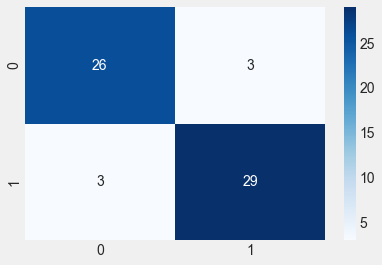

In [174]:
model = KNeighborsClassifier(n_neighbors=16)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
report = classification_report(y_test, y_pred)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')


In [175]:
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)


Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [176]:
results_cp

,Model,Training Accuracy %,Testing Accuracy %
0,"LogisticRegression(C=1, solver='newton-cg')",86.78,90.16
1,"SVC(C=1, kernel='poly')",92.98,86.89


## ROC KNN

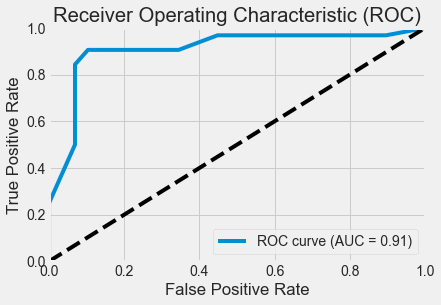

In [177]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=16)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Assume you have already trained your classification model (e.g., a logistic regression model) and have a test set X_test and y_test
y_pred_proba = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## ROC LR

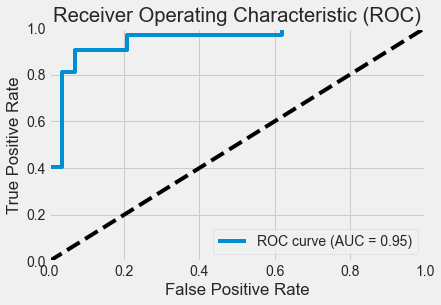

In [178]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model = LogisticRegression(solver="newton-cg", C=1, penalty='l2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Assume you have already trained your classification model (e.g., a logistic regression model) and have a test set X_test and y_test
y_pred_proba = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
